# Bài Thi Cuối kỳ Nhóm 1


- Nhóm trưởng:
  - Trần Thị Trúc Xinh - 030239230298
- Thành viên:
  - Đào Việt Anh - 030239230005
  - Nguyễn Thị Nhã Phương - 030239231094

## Chuẩn bị thư viện cần thiết

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Câu 1: Đọc và hiển thị các thông tin từ file vnstock_listing_companies.csv. 


In [4]:
# Đọc file CSV
df = pd.read_csv('vnstock_listing_companies.csv')

# In ra danh sách các cột và các kiểu dữ liệu tương ứng của mỗi cột
print("Danh sách các cột và kiểu dữ liệu tương ứng:")
print(df.dtypes)

# In ra 10 dòng dữ liệu đầu tiên, nhưng chỉ hiển thị các cột có kiểu dữ liệu số
numeric_data = df.select_dtypes(include='number')
print("\n10 dòng dữ liệu đầu tiên chỉ hiển thị các cột có kiểu dữ liệu số:")
print(numeric_data.head(10))

Danh sách các cột và kiểu dữ liệu tương ứng:
ticker               object
exchange             object
shortName            object
industry             object
industryEn           object
establishedYear     float64
noEmployees         float64
noShareholders      float64
foreignPercent      float64
website              object
stockRating         float64
outstandingShare    float64
issueShare          float64
companyType          object
monthlyRecords       object
dtype: object

10 dòng dữ liệu đầu tiên chỉ hiển thị các cột có kiểu dữ liệu số:
   establishedYear  noEmployees  noShareholders  foreignPercent  stockRating  \
0           1980.0        666.0           583.0           0.002          2.8   
1           2000.0          0.0           395.0           0.003          2.6   
2           2001.0        795.0           749.0           0.271          2.8   
3           2003.0        612.0          1228.0           0.259          2.9   
4           2003.0         21.0          1452.0       

## Câu 2: Viết hàm find_stock để tìm mã cổ phiếu X dựa vào mã số sinh viên (MSSV) 

In [5]:
# Hàm find_stock để tìm mã cổ phiếu dựa trên MSSV
def find_stock(mssv):
    # Lấy 4 số cuối của MSSV và chia lấy dư cho 500
    last_number = int(str(mssv)[-4:])
    index = last_number % 500
    
    # Kiểm tra điều kiện và lấy mã cổ phiếu tương ứng
    if index == 0:
        stock_code = df['ticker'].iloc[-1] # Mã cổ phiếu cuối cùng
    elif index % 2 == 0:
        stock_code = df['ticker'].iloc[index]# Nếu chẵn, lấy mã cổ phiếu ở vị trí index
    else:
        stock_code = df['ticker'].iloc[index - 1]  # Nếu lẻ, lấy mã cổ phiếu đứng trước vị trí index
    
    return stock_code

# MSSV của nhóm trưởng
mssv = '30239230298'

#Gọi hàm find_stock và in ra kết quả
stock_code = find_stock(mssv)
print(f'Mã cổ phiếu tương ứng với MSSV {mssv} là: {stock_code}')

Mã cổ phiếu tương ứng với MSSV 30239230298 là: SDA


### Câu 3: Hiển thị chi tiết thông tin của cổ phiếu X từ file

In [6]:
data = df[df['ticker'] == stock_code][['ticker', 'shortName','industry','monthlyRecords']]

# In ra kết quả
print(f'Thông tin chi tiết của cổ phiếu {stock_code}:' )
print(data)

Thông tin chi tiết của cổ phiếu SDA:
    ticker     shortName                    industry monthlyRecords
298    SDA  XKLĐ Sông Đà  Hàng & Dịch vụ Công nghiệp        SDA.csv


## Câu 4: Thống kê và mở rộng từ dữ liệu giao dịch của cổ phiếu X trong khoảng thời gian từ tháng 7 đến tháng 9 năm 2023

In [7]:
ticker = stock_code
df = pd.read_csv(f'transaction/{ticker}.csv')

# Tính tổng giá trị giao dịch hàng ngày
df['time total_trading_value'] = df['volume'] * df['close']

# Hiển thị kết quả
print(f'Tổng giá trị giao dịch hàng ngày của mã {ticker} từ tháng 7 đến tháng 9 năm 2023')
print(df[['time',  'time total_trading_value']])


# Chuyển dữ liệu vào DataFrame
df = pd.DataFrame(df)

# Bước 1: Chuyển đổi cột 'time' thành kiểu datetime
df['time'] = pd.to_datetime(df['time'])

# Bước 2: Chuyển đổi cột 'time' thành định dạng tháng
df['Month'] = df['time'].dt.to_period('M')

# Tính giá đóng cửa trung bình cho từng tháng
monthly_avg_close = df.groupby('Month')['close'].mean().reset_index()

# Hiển thị kết quả
print("Giá Close trung bình cho từng tháng:")
print(monthly_avg_close)

Tổng giá trị giao dịch hàng ngày của mã SDA từ tháng 7 đến tháng 9 năm 2023
           time  time total_trading_value
0    2023-01-03                 375360000
1    2023-01-04                 484400000
2    2023-01-05                 299600000
3    2023-01-06                 142830000
4    2023-01-09                 449190000
..          ...                       ...
189  2023-10-09                1177180000
190  2023-10-10                1529580000
191  2023-10-11                 352080000
192  2023-10-12                1225460000
193  2023-10-13                 257600000

[194 rows x 2 columns]
Giá Close trung bình cho từng tháng:
     Month        close
0  2023-01  6893.750000
1  2023-02  6265.000000
2  2023-03  5695.652174
3  2023-04  6025.000000
4  2023-05  6860.000000
5  2023-06  9122.727273
6  2023-07  8347.619048
7  2023-08  8847.826087
8  2023-09  7721.052632
9  2023-10  6940.000000


## Câu 5: So sánh giá Close - Open của các giao dịch tháng 7/2023 đến tháng 9/2023

In [8]:
#Thêm cột Info01 dựa trên điều kiện so sánh giữa Close và Open
df['Info01'] = 0  # Khởi tạo cột Info01 với giá trị mặc định là 0
df.loc[df['close'] > df['open'], 'Info01'] = 1   # Nếu Close > Open, gán giá trị 1
df.loc[df['close'] < df['open'], 'Info01'] = -1  # Nếu Close < Open, gán giá trị -1

# Hiển thị kết quả
print(df[['time','open','close','Info01']])

          time  open  close  Info01
0   2023-01-03  6300   6800       1
1   2023-01-04  7000   7000       0
2   2023-01-05  7000   7000       0
3   2023-01-06  6800   6900       1
4   2023-01-09  6900   6900       0
..         ...   ...    ...     ...
189 2023-10-09  7000   7100       1
190 2023-10-10  7500   7400      -1
191 2023-10-11  7500   7200      -1
192 2023-10-12  7200   7100      -1
193 2023-10-13  7000   7000       0

[194 rows x 4 columns]


## Câu 6: Thống kê giá Close so với ngày trước đó trong lịch sử giao dịch trên

In [9]:
# Thêm cột Info02 dựa trên giá Close của giao dịch trước
df['Prev_Close'] = df['close'].shift(1)  # Lấy giá Close của giao dịch trước
df['Info02'] = 0  # Khởi tạo cột Info02 với giá trị mặc định là 0

# Gán giá trị cho Info02
df.loc[df['close'] > df['Prev_Close'], 'Info02'] = 1   # Nếu Close hiện tại lớn hơn Close trước
df.loc[df['close'] < df['Prev_Close'], 'Info02'] = -1  # Nếu Close hiện tại nhỏ hơn Close trước

# Xóa cột Prev_Close nếu không cần thiết
df.drop(columns=['Prev_Close'], inplace=True)

# Hiển thị kết quả
print(df[['time','open','close','Info01','Info02']])

# Lưu tất cả thông tin vào file CSV
df.to_csv(f'{stock_code}_Stock.csv', index=False)

          time  open  close  Info01  Info02
0   2023-01-03  6300   6800       1       0
1   2023-01-04  7000   7000       0       1
2   2023-01-05  7000   7000       0       0
3   2023-01-06  6800   6900       1      -1
4   2023-01-09  6900   6900       0       0
..         ...   ...    ...     ...     ...
189 2023-10-09  7000   7100       1       1
190 2023-10-10  7500   7400      -1       1
191 2023-10-11  7500   7200      -1      -1
192 2023-10-12  7200   7100      -1      -1
193 2023-10-13  7000   7000       0      -1

[194 rows x 5 columns]


## Câu 7: Trực quan hóa biểu đồ Volume của giao dịch

Giá trị trung bình của Volume từ tháng 7 đến tháng 9: 169282.47422680413


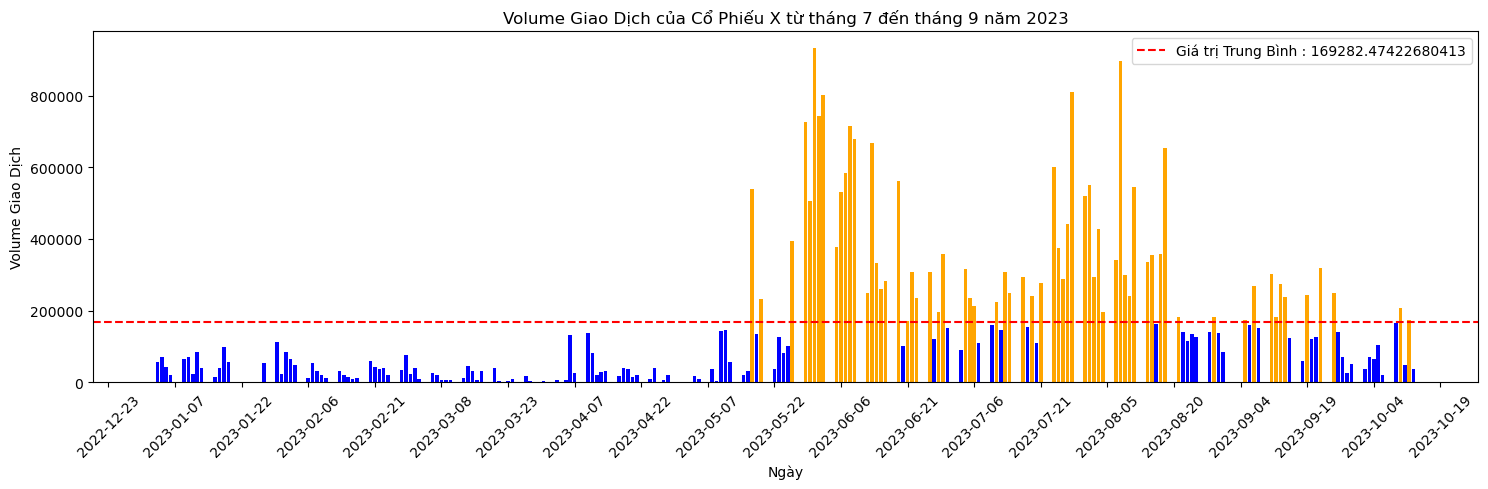

In [10]:

# Tính giá trị trung bình của Volume
average_volume = df['volume'].mean()
print(f'Giá trị trung bình của Volume từ tháng 7 đến tháng 9: {average_volume}')

# Tạo biểu đồ
plt.figure(figsize=(15,5))
colors = ['blue' if volume <= average_volume else 'orange' for volume in df['volume']]

# Vẽ biểu đồ cột
plt.bar(df['time'], df['volume'], color=colors)

# Thêm đường ngang cho giá trị trung bình
plt.axhline(y=average_volume, color='red', linestyle='--', label= f'Giá trị Trung Bình : {average_volume}')

# Định dạng trục x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))

# Thêm tiêu đề và nhãn
plt.title('Volume Giao Dịch của Cổ Phiếu X từ tháng 7 đến tháng 9 năm 2023')
plt.xlabel('Ngày')
plt.ylabel('Volume Giao Dịch')
plt.xticks(rotation=45)  # Xoay nhãn trên trục x
plt.legend()
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


## Câu 8: Thống kê và trực quan hóa giá biến động của cổ phiếu

Số lần phát sinh giao dịch: 194
Giá Close trung bình: 7319.07
Giá Close cao nhất: 10500.00
Giá Close thấp nhất: 5400.00


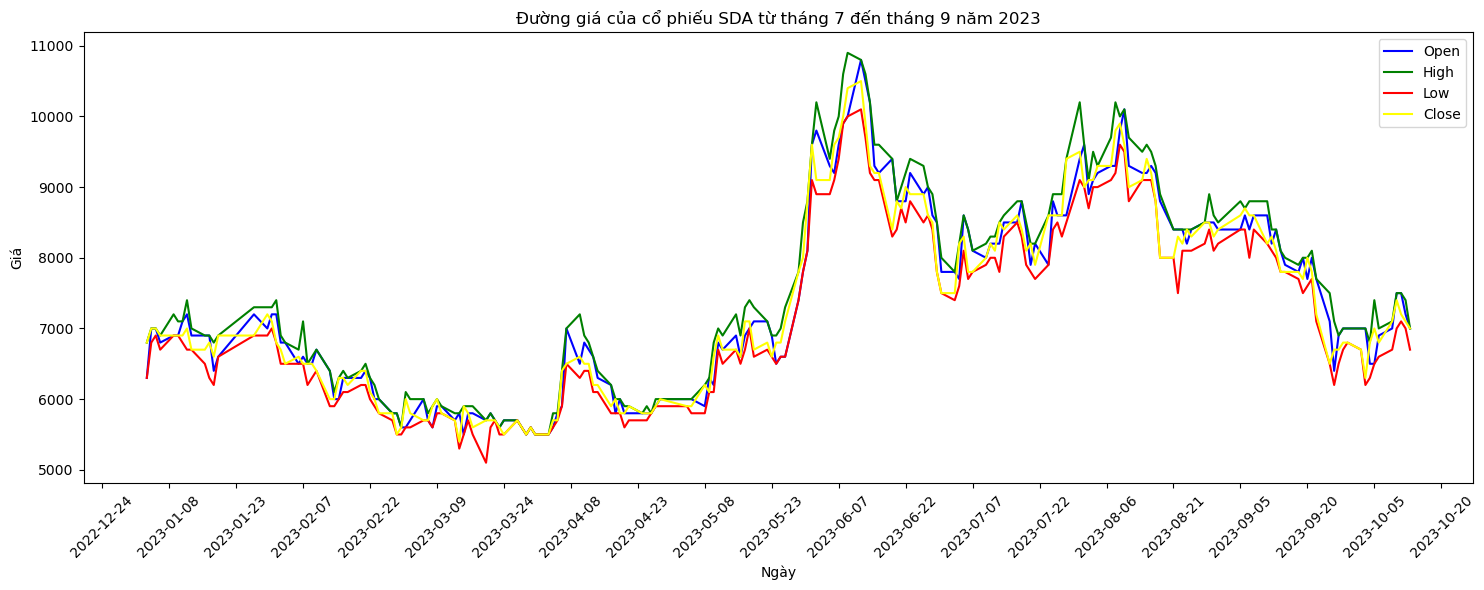

In [11]:
# Thực hiện thống kê
transaction_count = len(df)  # Số lần phát sinh giao dịch
average_close = df['close'].mean()  # Giá Close trung bình
max_close = df['close'].max()  # Giá Close cao nhất
min_close = df['close'].min()  # Giá Close thấp nhất

# In kết quả thống kê
print(f'Số lần phát sinh giao dịch: {transaction_count}')
print(f'Giá Close trung bình: {average_close:.2f}')
print(f'Giá Close cao nhất: {max_close:.2f}')
print(f'Giá Close thấp nhất: {min_close:.2f}')

# Vẽ biểu đồ Line cho các giá
plt.figure(figsize=(15, 6))

# Vẽ các đường cho Open, High, Low, Close
plt.plot(df['time'], df['open'], label='Open', color='blue')
plt.plot(df['time'], df['high'], label='High', color='green')
plt.plot(df['time'], df['low'], label='Low', color='red')
plt.plot(df['time'], df['close'], label='Close', color='yellow')

# Định dạng trục x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))

# Thêm tiêu đề và nhãn
plt.title(f'Đường giá của cổ phiếu {stock_code} từ tháng 7 đến tháng 9 năm 2023')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.xticks(rotation=45)  # Xoay nhãn trên trục x
plt.legend()
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## Câu 9: Huấn luyện mô hình dự đoán giá Close dựa vào các thông tin liên quan bằng mô hình hồi quay tuyến tính

In [12]:

# Tách dữ liệu thành biến độc lập (X) và biến phụ thuộc (y)
X = df[['volume', 'open', 'high', 'low']]
y = df['close']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Lấy các hệ số hồi quy của từng biến độc lập
print("Hệ số hồi quy của mô hình:")
print(f"{'':<10} {'Coefficient':<10}")
print(f"Volume    {model.coef_[0]:>10.6f}")
print(f"Open      {model.coef_[1]:>10.6f}")
print(f"High      {model.coef_[2]:>10.6f}")
print(f"Low       {model.coef_[3]:>10.6f}")


# Tính R-squared trên tập huấn luyện và tập kiểm tra
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared:  {r2}")

# Dự đoán giá Close trên tập kiểm tra
y_pred = model.predict(X_test)

# Hiển thị kết quả dự đoán và so sánh với giá trị thực tế
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSo sánh - Kiểm thử mô hình:")
print(predicted_vs_actual)


Hệ số hồi quy của mô hình:
           Coefficient
Volume      0.000155
Open       -0.270627
High        0.518015
Low         0.729481
R-squared:  0.9872224542678705

So sánh - Kiểm thử mô hình:
     Actual    Predicted
138    8600  8711.392261
16     6800  7041.431075
155    8000  8349.263591
96     7800  7731.943985
68     6200  6248.298937
153    9200  9250.958291
55     5600  5654.128247
15     7100  7126.393115
112    8800  8503.550832
111    8400  8650.418719
184    6700  6808.242458
18     6500  6614.437510
82     6100  6192.148607
9      6700  6633.988713
164    8400  8308.062667
117    8600  8701.968673
69     5900  5950.709039
113    8700  8836.870086
191    7200  7225.592304
119    7800  8031.717793
123    8300  8256.165764
144    9100  9273.263397
66     6500  6564.389688
45     5400  5491.455743
158    8200  8188.205598
115    8900  9018.651318
67     6200  6270.201216
93     6800  6752.971903
30     6400  6347.818490
101    9100  9086.622635
118    8500  8624.155111
75    

## Câu 10: Phân cụm và vẽ biểu đồ cụm của các ngày giao dịch dựa vào mô hình K_Mean

Số lượng ngày giao dịch thuộc về mỗi cụm:
0		128
1		19
2		47
Trung tâm của cụm 0: 57004.687500  6682.812500  6810.937500  6482.812500  6639.843750
Trung tâm của cụm 1: 660684.210526  9005.263158  9478.947368  8678.947368  9036.842105
Trung tâm của cụm 2: 276408.510638  8606.382979  8810.638298  8276.595745  8474.468085


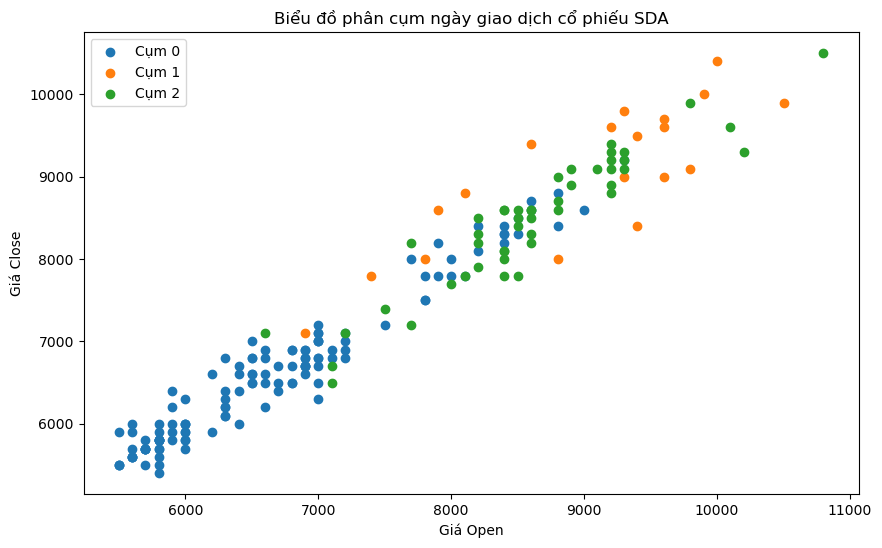

In [13]:
from sklearn.cluster import KMeans
# Chọn các biến dùng để phân cụm
X = df[['volume', 'open', 'high', 'low', 'close']]

# Khởi tạo và huấn luyện mô hình K-Means với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Hiển thị số lượng ngày giao dịch thuộc về mỗi cụm
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Số lượng ngày giao dịch thuộc về mỗi cụm:")
for cluster, count in cluster_counts.items():
    print(f"{cluster}\t\t{count}")

# In ra trung tâm của mỗi cụm
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['volume', 'open', 'high', 'low', 'close'])
for i, row in cluster_centers.iterrows():
    # Định dạng mỗi số với độ rộng cố định và không có dấu phân cách
    center_str = '  '.join(f'{num:10.6f}' for num in row)
    print(f"Trung tâm của cụm {i}: {center_str}")

# Vẽ biểu đồ scatter plot với màu sắc tương ứng cho mỗi cụm (dùng Open và Close làm trục)
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['open'], cluster_data['close'], label=f'Cụm {cluster}')

plt.xlabel('Giá Open')
plt.ylabel('Giá Close')
plt.title(f'Biểu đồ phân cụm ngày giao dịch cổ phiếu {ticker}')
plt.legend()
plt.show()